# WEPP Run Result Analysis

In [53]:
#### import libraries 
import pandas as pd
import geopandas as gpd
import glob
import os
import itertools
from datetime import datetime, timedelta, date
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [54]:
from IPython.core.display import HTML as Center

Center(""" <style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style> """)

In [55]:
######### This part will hide warnings, if any from your notebook 
####################################################################
from plotnine import *
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [56]:
### Short cuts 

## use Esc+ A to add new cell above
##use Esc + B to add new cell below
## Use Esc m to change the cell to mark down
## Use Esc y to change the cell to main code cell

In [57]:
maindir = 'C:\\Users\\mugalsamrat.dahal\\OneDrive - Washington State University (email.wsu.edu)\\Paper2\\Weppwatershed'
os.chdir(maindir)

In [58]:
###### import functions from my directory ###############
from determine_wateryear import determine_wateryear
#from yearly_erosion_single_hillslope import calcyearlyval
from yearly_watershed import yearly_agg_watershed
from allhillslope_average import allhillslope_average
from yearly_erosion_ebe import calcyearlyerr
from water_balance_aggregate import aggregate_water_balance

In [59]:
################High #############

weppdirA = "F:\\WORK\\Project_2\\WEPPwatershed\\springcreek_past_altrot"
# weppdir = "F:\\WORK\\Project_2\\WEPPwatershed\\after_anisotropy\\New_batch_past_and_present\\springcreek_present_intense"
weppdir = "F:\\WORK\\Project_2\\WEPPwatershed\\after_anisotropy\\New_batch_past_and_present\\springcreek_past_altrot"
weppdir2 = "F:\\WORK\\Project_2\\WEPPwatershed\\after_anisotropy\\New_batch_past_and_present\\springcreek_past"
# weppdir2 = "F:\\WORK\\Project_2\\WEPPwatershed\\after_anisotropy\\New_batch_past_and_present\\springcreek_present_reduced"
# weppdir3 = "F:\\WORK\\Project_2\\WEPPwatershed\\after_anisotropy\\New_batch_past_and_present\\springcreek_present_notill"
#### Intermediate #####################################################################

# weppdirA = "F:\\WORK\\Project_2\\WEPPwatershed\\upper_imbler_creek"
# weppdir = "F:\\WORK\\Project_2\\WEPPwatershed\\after_anisotropy\\New_batch_past_and_present\\upper_imbler_present_intense"
weppdir = "F:\\WORK\\Project_2\\WEPPwatershed\\after_anisotropy\\New_batch_past_and_present\\springcreek_past_altrot"
weppdir2 = "F:\\WORK\\Project_2\\WEPPwatershed\\after_anisotropy\\New_batch_past_and_present\\springcreek_past"
# weppdir2 = "F:\\WORK\\Project_2\\WEPPwatershed\\after_anisotropy\\New_batch_past_and_present\\upper_imbler_present_reduced"
# weppdir3 = "F:\\WORK\\Project_2\\WEPPwatershed\\after_anisotropy\\New_batch_past_and_present\\upper_imbler_present_notill"

# weppdir = "F:\\WORK\\Project_2\\WEPPwatershed\\upper_imbler_creek"
# weppdir2 = "F:\\WORK\\Project_2\\WEPPwatershed\\upper_imbler_creek_altrot"
################################################################

################# Low ########################################
# weppdirA = "F:\\WORK\\Project_2\\WEPPwatershed\\winn_lake_canyon"
# weppdir = "F:\\WORK\\Project_2\\WEPPwatershed\\after_anisotropy\\New_batch_past_and_present\\winn_lake_canyon_present_intense"
weppdir = "F:\\WORK\\Project_2\\WEPPwatershed\\after_anisotropy\\New_batch_past_and_present\\springcreek_past_altrot"
weppdir2 = "F:\\WORK\\Project_2\\WEPPwatershed\\after_anisotropy\\New_batch_past_and_present\\springcreek_past"
# weppdir2 = "F:\\WORK\\Project_2\\WEPPwatershed\\after_anisotropy\\New_batch_past_and_present\\winn_lake_canyon_present_reduced"
# weppdir3 = "F:\\WORK\\Project_2\\WEPPwatershed\\after_anisotropy\\New_batch_past_and_present\\winn_lake_canyon_present_notill"

# weppdir = "F:\\WORK\\Project_2\\WEPPwatershed\\winn_lake_canyon"
# weppdir2 = "F:\\WORK\\Project_2\\WEPPwatershed\\winn_lake_canyon_altrot"
################################################################


In [60]:
wsd = gpd.read_file(weppdirA+"\\export\\arcmap\\subcatchments.shp")

In [61]:
##### Compile the annual average erosion for each hillslope ###############
hillslope_avg_int = allhillslope_average(weppdir+"\\wepp\\output")
hillslope_avg_int.columns = ['Hillslope', 'Erosion (t/ha)']
hillslope_avg_int[['Hillslope']] = hillslope_avg_int[['Hillslope']].astype(int)

In [62]:
myfinmerge=pd.merge(wsd,hillslope_avg_int, how = "right", left_on=['WeppID'], right_on = ['Hillslope'])

In [63]:
whit = gpd.read_file("F:\\WORK\\kRESearch\\GIS_analysis\\Whitman_prj.shp")

# Study Area

<AxesSubplot:>

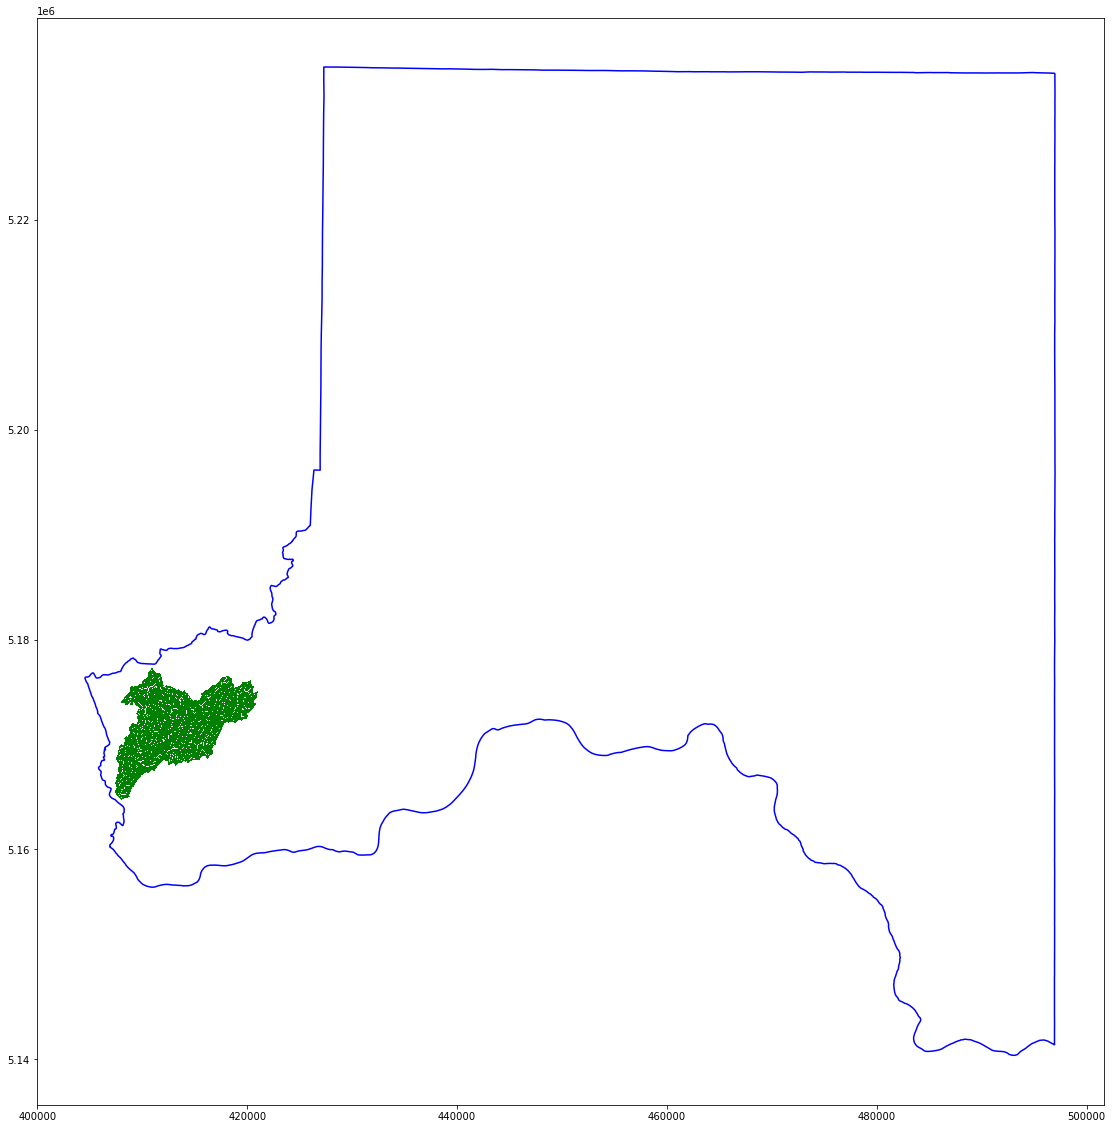

In [64]:
ax = whit.plot(color='none', edgecolor = 'blue', linewidths = 1.5, figsize = (20,20))
myfinmerge.plot(ax=ax, color ='green', edgecolor='none', figsize = (20,20))
#whit.plot(column='slope', scheme="Fisher_Jenks",k=4, cmap='RdYlBu', legend=True, figsize=(20, 20))

In [65]:
# gif, ax = plt.subplots(1,1)
# whit.plot(ax=ax)
# myfinmerge.plot(ax=ax, color = 'black', edgecolor = 'none')
# plt.figure(figsize = (10,12))
# plt.show()
# #myfinmerge.plot(ax = ax, color='blue', edgecolor = 'none', linewidths = 2)

# Slope distribution 

<AxesSubplot:>

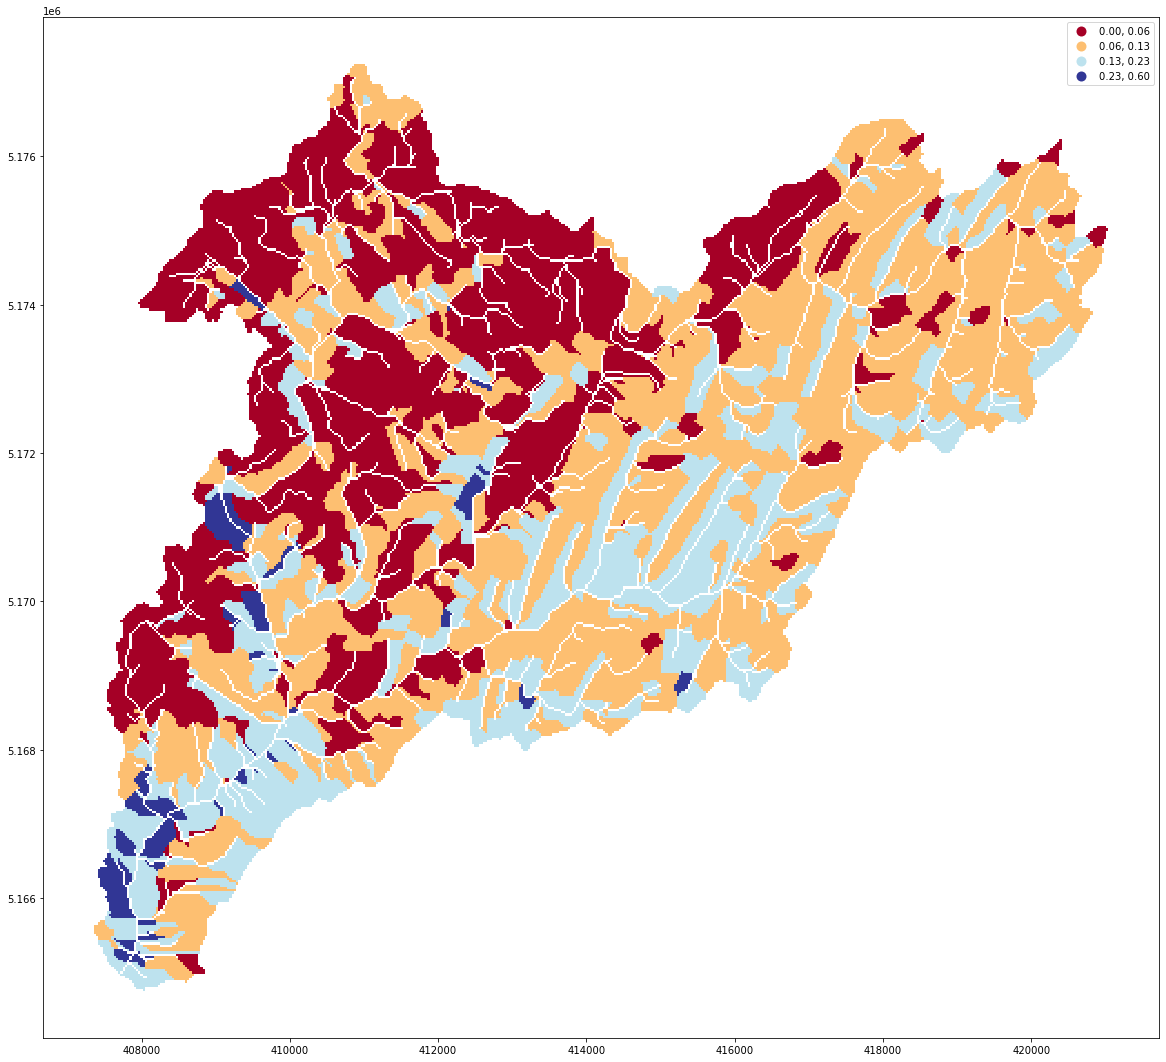

In [66]:
#### This is slope distribution #########
########################################
myfinmerge.plot(column='slope', scheme="Fisher_Jenks",k=4, cmap='RdYlBu', legend=True, figsize=(20, 20))

# Spatial distribution of erosion in the watershed

<AxesSubplot:>

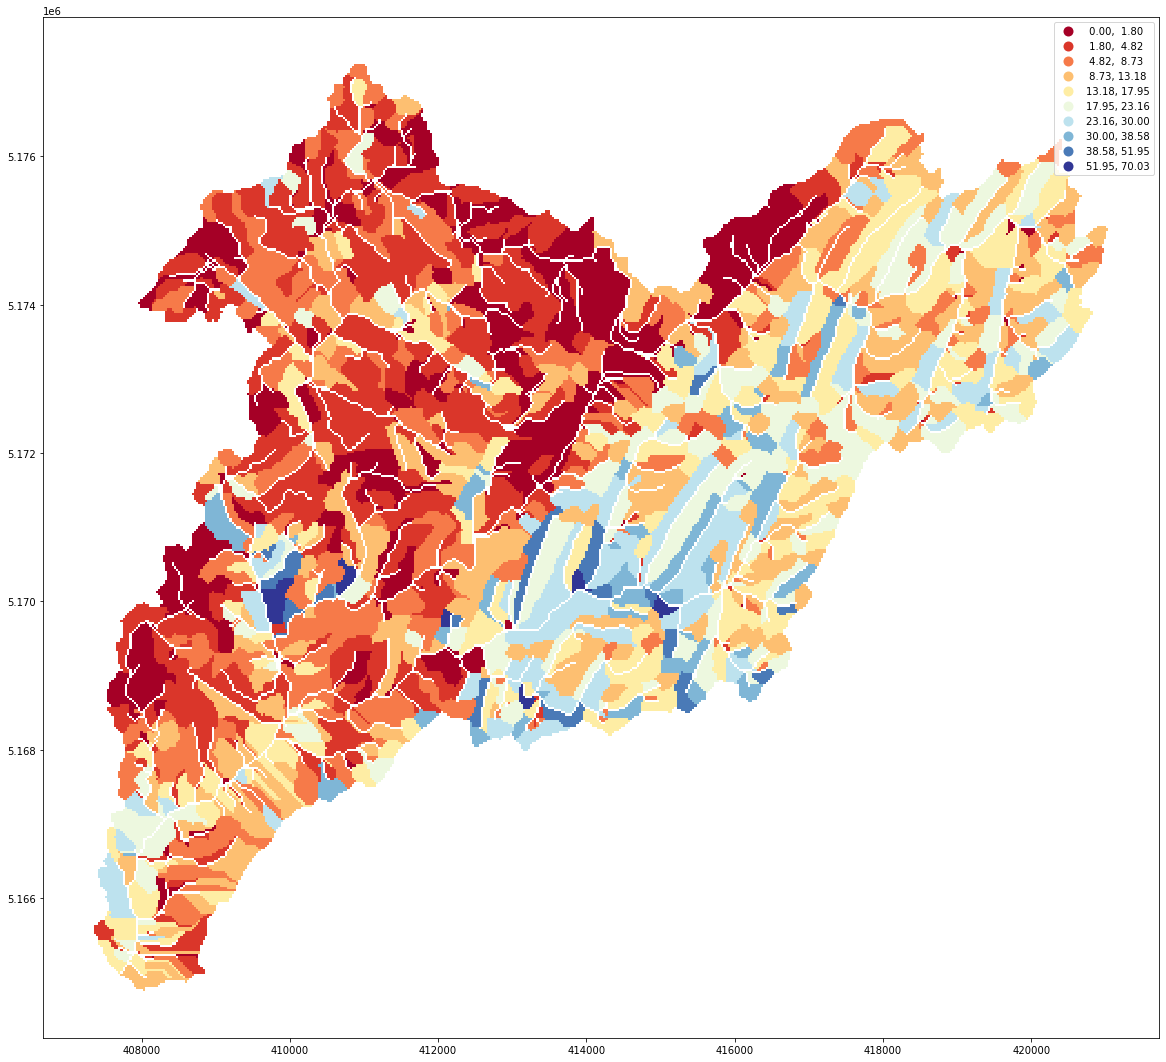

In [67]:
myfinmerge.plot(column='Erosion (t/ha)', scheme="Fisher_jenks",k=10, cmap='RdYlBu', legend=True, figsize=(20, 20))

# Temporal distribution of Erosion in the watershed

In [68]:
yearly_wat_df_int = yearly_agg_watershed(weppdir+"\\wepp\\output")
yearly_wat_df_red = yearly_agg_watershed(weppdir2+"\\wepp\\output")
yearly_wat_df_nt = yearly_agg_watershed(weppdir3+"\\wepp\\output")

In [69]:
sed_yearly_int = yearly_wat_df_int[0].reset_index()
wat_bal_yearly_int = yearly_wat_df_int[1].reset_index()

sed_yearly_red = yearly_wat_df_red[0].reset_index()
wat_bal_yearly_red = yearly_wat_df_red[1].reset_index()

sed_yearly_nt = yearly_wat_df_nt[0].reset_index()
wat_bal_yearly_nt = yearly_wat_df_nt[1].reset_index()

In [70]:
sed_avg_int = round(sed_yearly_int['Sed. Det. (t/ha)'].mean(),2)
print("Average annual sediment detachment ",sed_avg_int,"t/ha for intense tillage")

sed_avg_red = round(sed_yearly_red['Sed. Det. (t/ha)'].mean(),2)
print("Average annual sediment detachment ",sed_avg_red,"t/ha for reduced tillage")

sed_avg_nt = round(sed_yearly_nt['Sed. Det. (t/ha)'].mean(),2)
print("Average annual sediment detachment ",sed_avg_nt,"t/ha for no tillage")

Average annual sediment detachment  10.5 t/ha for intense tillage
Average annual sediment detachment  3.85 t/ha for reduced tillage
Average annual sediment detachment  1.1 t/ha for no tillage


In [71]:
tovals_names1_int = sed_yearly_int.columns.tolist()[1:]
tovals_names1_red = sed_yearly_red.columns.tolist()[1:]
tovals_names1_nt = sed_yearly_nt.columns.tolist()[1:]

In [72]:
#tovals_names1 

In [73]:
sed_yearly2_int = pd.melt(sed_yearly_int,id_vars = ['WY'], value_vars = tovals_names1_int, value_name = "Quantity", var_name = "Erosion")

sed_yearly2_red = pd.melt(sed_yearly_red,id_vars = ['WY'], value_vars = tovals_names1_red, value_name = "Quantity", var_name = "Erosion")

sed_yearly2_nt = pd.melt(sed_yearly_nt,id_vars = ['WY'], value_vars = tovals_names1_nt, value_name = "Quantity", var_name = "Erosion")

In [74]:
mythemes = theme(axis_title_x = element_blank(),
          axis_title_y = element_text(size =20),
          axis_text_x = element_text(size=15),
          axis_text_y = element_text(size=15),
          strip_text_x = element_text(size=15),
         panel_grid_minor = element_blank(), axis_line = element_line(colour = "black"),
         legend_position = (0.8,0.20),
        legend_direction = 'horizontal',
          legend_box_just = 'right',
          legend_title = element_blank(),
           legend_text = element_text(size = 18),
          legend_entry_spacing_x = 20, figure_size = (10,10))

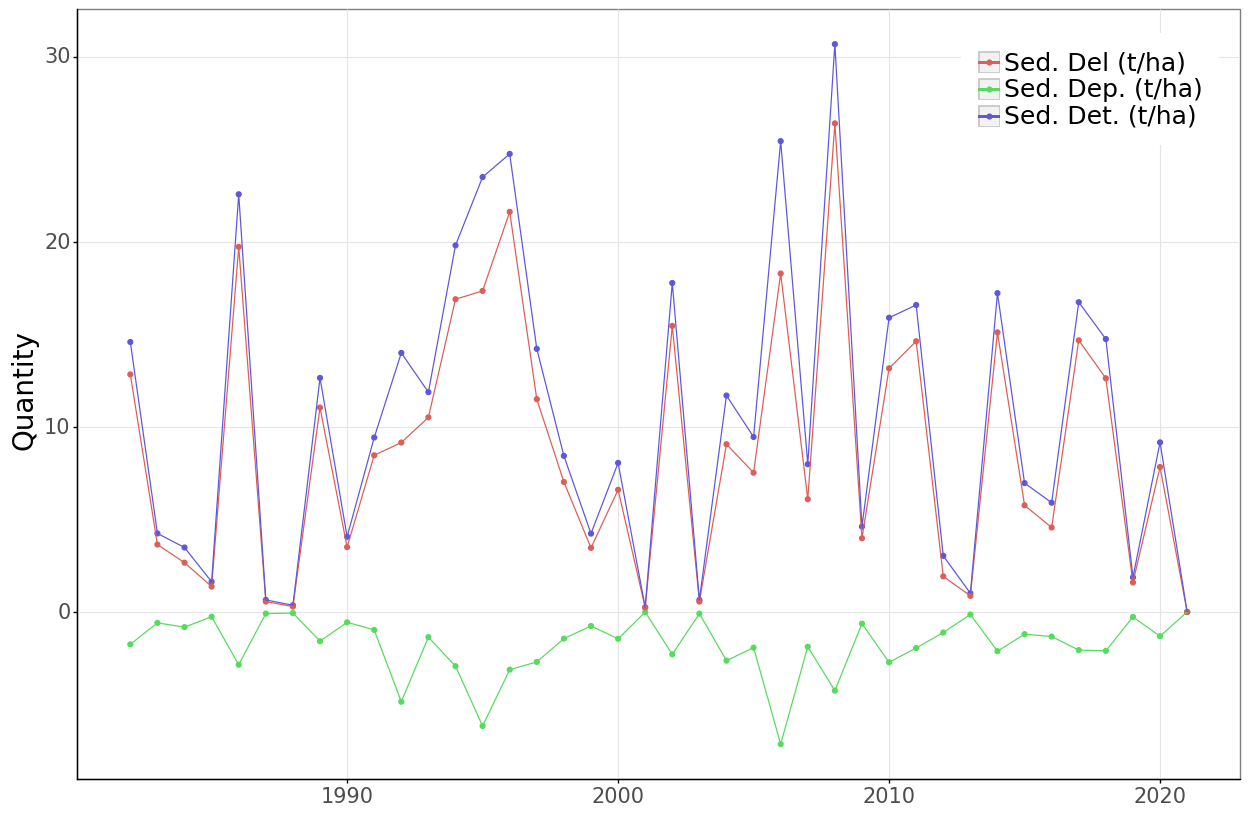

<ggplot: (101797153360)>

In [75]:
ggplot(sed_yearly2_int, aes('WY', 'Quantity', color = 'Erosion'))+geom_point()+geom_line()+theme_bw()+mythemes+\
theme(legend_direction = 'vertical', legend_position = (0.8,0.80), figure_size = (15,10))

### Comparing with Observed erosion 

In [76]:
observed_data = pd.read_csv("F:\WORK\Project_2\save\observed_whit.csv")

In [77]:
#ggplot(observed_data, aes('Year', 'Mean Soil Loss'))+geom_point()+geom_line()
# +\
#         geom_line(observed_data, aes('Year', 'Mean Soil Loss'))+\    
#         theme_bw()+mythemes

In [78]:
observed_data_erosion = observed_data[['Year','Mean Soil Loss']]
observed_data_erosion.columns = ['WY', 'Observed Soil Loss']

In [79]:
sed_observed2 = pd.melt(observed_data_erosion,id_vars = ['WY'], value_vars = ['Observed Soil Loss'], value_name = "Quantity", var_name = "Erosion")

In [80]:
#sed_observed2

In [81]:
sed_year_obs_mod = pd.concat([sed_observed2,sed_yearly2_int])

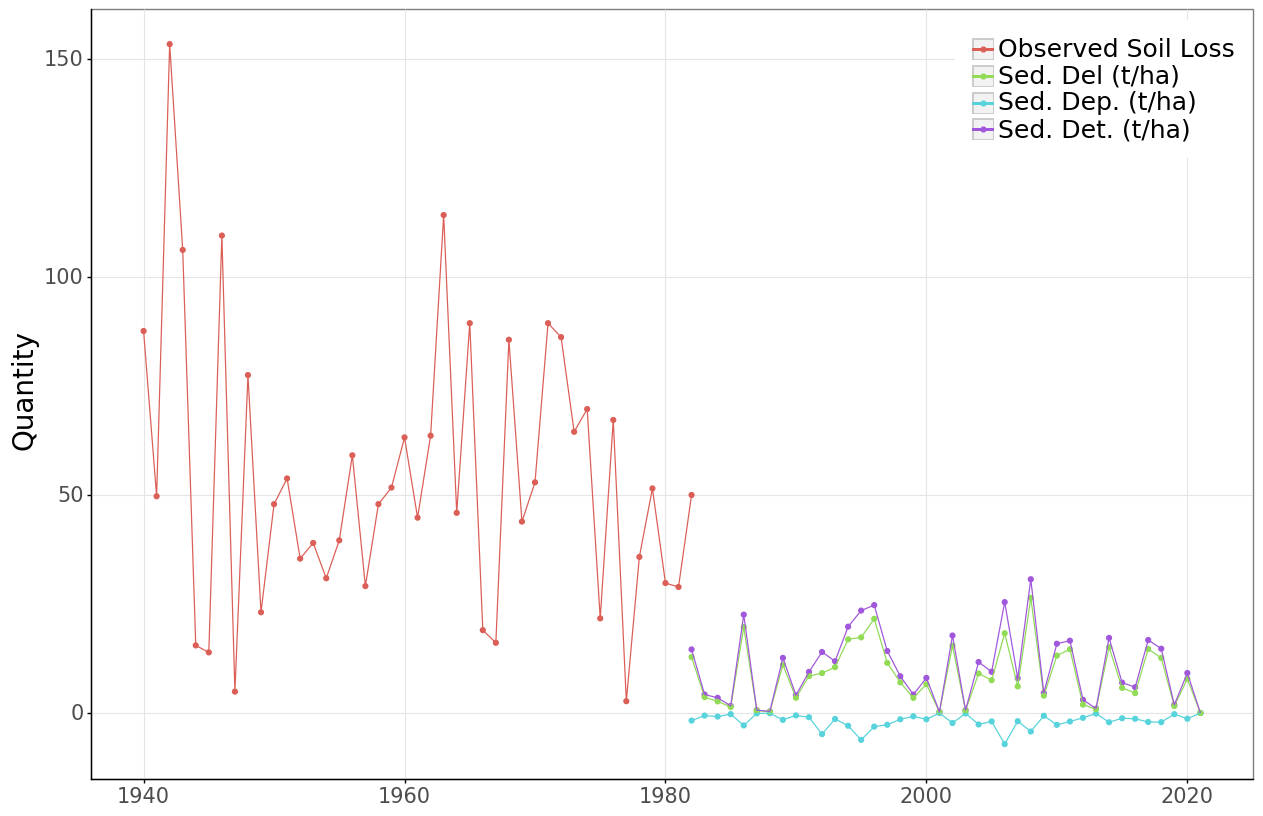

<ggplot: (101795947542)>

In [82]:
ggplot(sed_year_obs_mod, aes('WY', 'Quantity', color = 'Erosion'))+geom_point()+geom_line()+theme_bw()+mythemes+\
theme(legend_direction = 'vertical', legend_position = (0.8,0.80), figure_size = (15,10))

### Compare with hillslope average method

In [83]:
comp_dat=pd.read_csv("F:\\WORK\\Project_2\\WEPP_runs\\WEPPrun\\Two_ofe\\past\\fallow_wheat_rotation\\results\\corr_mat(rot name rename).csv")

In [84]:
comp_dat2 = comp_dat[['Year','Observed', 'Fallow-Wheat','Wheat-Fallow']]

In [85]:
sedcomp_int = sed_yearly_int[['WY','Sed. Det. (t/ha)']]
sedcomp_int.columns = ['Year', 'Erosion (t/ha)']
sedcomp_int['Type'] = "Intense"

sedcomp_red = sed_yearly_red[['WY','Sed. Det. (t/ha)']]
sedcomp_red.columns = ['Year', 'Erosion (t/ha)']
sedcomp_red['Type'] = "Reduced"

sedcomp_nt = sed_yearly_nt[['WY','Sed. Det. (t/ha)']]
sedcomp_nt.columns = ['Year', 'Erosion (t/ha)']
sedcomp_nt['Type'] = "No-till"

observed_data_erosion.columns = ['Year', 'Erosion (t/ha)']
observed_data_erosion['Type'] = "Observed"


In [86]:
pd_presentvs_observed = pd.concat([sedcomp_int,sedcomp_red,sedcomp_nt,observed_data_erosion]) ##,sedcomp_nt,observed_data_erosion

In [87]:
pd_presentvs_observed

,Year,Erosion (t/ha),Type
0,1982,14.58,Intense
1,1983,4.24,Intense
2,1984,3.48,Intense
3,1985,1.63,Intense
4,1986,22.56,Intense
...,...,...,...
38,1978,35.80,Observed
39,1979,51.50,Observed
40,1980,29.80,Observed
41,1981,28.90,Observed


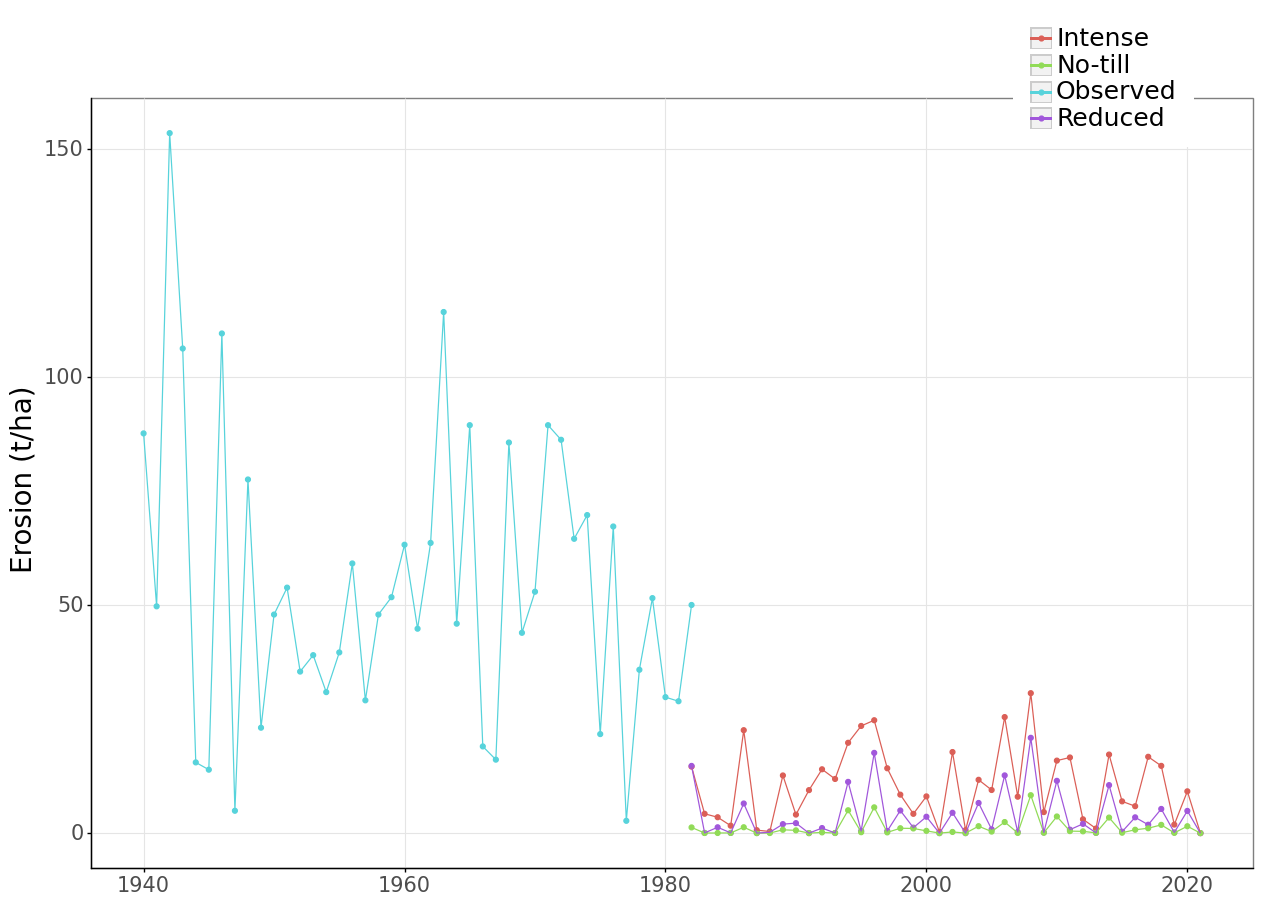

<ggplot: (101793458531)>

In [88]:
ggplot(pd_presentvs_observed, aes('Year', 'Erosion (t/ha)', color = 'Type'))+geom_point()+geom_line()+theme_bw()+mythemes+\
theme(legend_direction = 'vertical', legend_position = (0.8,0.90), figure_size = (15,10))

In [89]:
##### combine three tillage using percent tillage ################
till_per = pd.read_csv("F:\\WORK\\Project_2\\WEPPwatershed\\tillage_whitman_yearly.csv")
till_per

,Year,Int,Red,No-till
0,2020,6.462,73.354,20.184
1,2019,9.248,70.636,20.116
2,2018,12.034,67.918,20.048
3,2017,14.820,65.200,19.980
4,2016,17.606,62.482,19.912
5,2015,20.392,59.764,19.844
6,2014,23.178,57.046,19.776
7,2013,25.964,54.328,19.708
8,2012,28.750,51.610,19.640
9,2011,31.536,48.892,19.572


In [90]:
pd_present = pd_presentvs_observed[pd_presentvs_observed['Type']!="Observed"]
pd_present

pd_present = pd_present.pivot(index = 'Year', columns='Type')
pd_present
pd_present.columns = pd_present.columns.droplevel()
pd_present = pd_present.reset_index()
pd_present

Type,Year,Intense,No-till,Reduced
0,1982,14.58,1.25,14.73
1,1983,4.24,0.02,0.05
2,1984,3.48,0.03,1.28
3,1985,1.63,0.04,0.05
4,1986,22.56,1.29,6.49
5,1987,0.65,0.00,0.01
6,1988,0.36,0.02,0.19
7,1989,12.64,0.73,1.97
8,1990,4.06,0.61,2.19
9,1991,9.42,0.00,0.00


In [91]:
pre_till_per = pd.merge(till_per,pd_present,on ="Year")
pre_till_per

,Year,Int,Red,No-till_x,Intense,No-till_y,Reduced
0,2020,6.462,73.354,20.184,9.16,1.51,4.87
1,2019,9.248,70.636,20.116,1.87,0.06,0.15
2,2018,12.034,67.918,20.048,14.74,1.81,5.30
3,2017,14.820,65.200,19.980,16.73,1.07,1.84
4,2016,17.606,62.482,19.912,5.90,0.74,3.46
5,2015,20.392,59.764,19.844,6.96,0.09,0.32
6,2014,23.178,57.046,19.776,17.22,3.41,10.52
7,2013,25.964,54.328,19.708,1.01,0.06,0.06
8,2012,28.750,51.610,19.640,3.03,0.39,2.03
9,2011,31.536,48.892,19.572,16.58,0.44,0.76


In [92]:
pre_till_per['Avg']= (pre_till_per["Int"]*pre_till_per["Intense"]/100)+(pre_till_per["Red"]*pre_till_per["Reduced"]/100)+(pre_till_per["No-till_x"]*pre_till_per["No-till_y"]/100)
pre_till_per
present_avg = pre_till_per[['Year','Avg']]
present_avg
present_avg.columns = ['Year', 'Present_simulated']
present_avg_mlt = pd.melt(present_avg,id_vars = ['Year'], value_vars = ['Present_simulated'],
                          value_name =  "Erosion (t/ha)", var_name = "Type")
present_avg_mlt

,Year,Type,Erosion (t/ha)
0,2020,Present_simulated,4.469037
1,2019,Present_simulated,0.290961
2,2018,Present_simulated,5.736334
3,2017,Present_simulated,3.892852
4,2016,Present_simulated,3.347980
5,2015,Present_simulated,1.628388
6,2014,Present_simulated,10.666852
7,2013,Present_simulated,0.306658
8,2012,Present_simulated,1.995404
9,2011,Present_simulated,5.686365


In [93]:
pre_avgvs_observed = pd.concat([observed_data_erosion,present_avg_mlt]) 

In [94]:
pre_avgvs_observed

,Year,Erosion (t/ha),Type
0,1940,87.600000,Observed
1,1941,49.700000,Observed
2,1942,153.400000,Observed
3,1943,106.200000,Observed
4,1944,15.500000,Observed
...,...,...,...
34,1986,18.758626,Present_simulated
35,1985,1.346916,Present_simulated
36,1984,2.868108,Present_simulated
37,1983,3.494410,Present_simulated


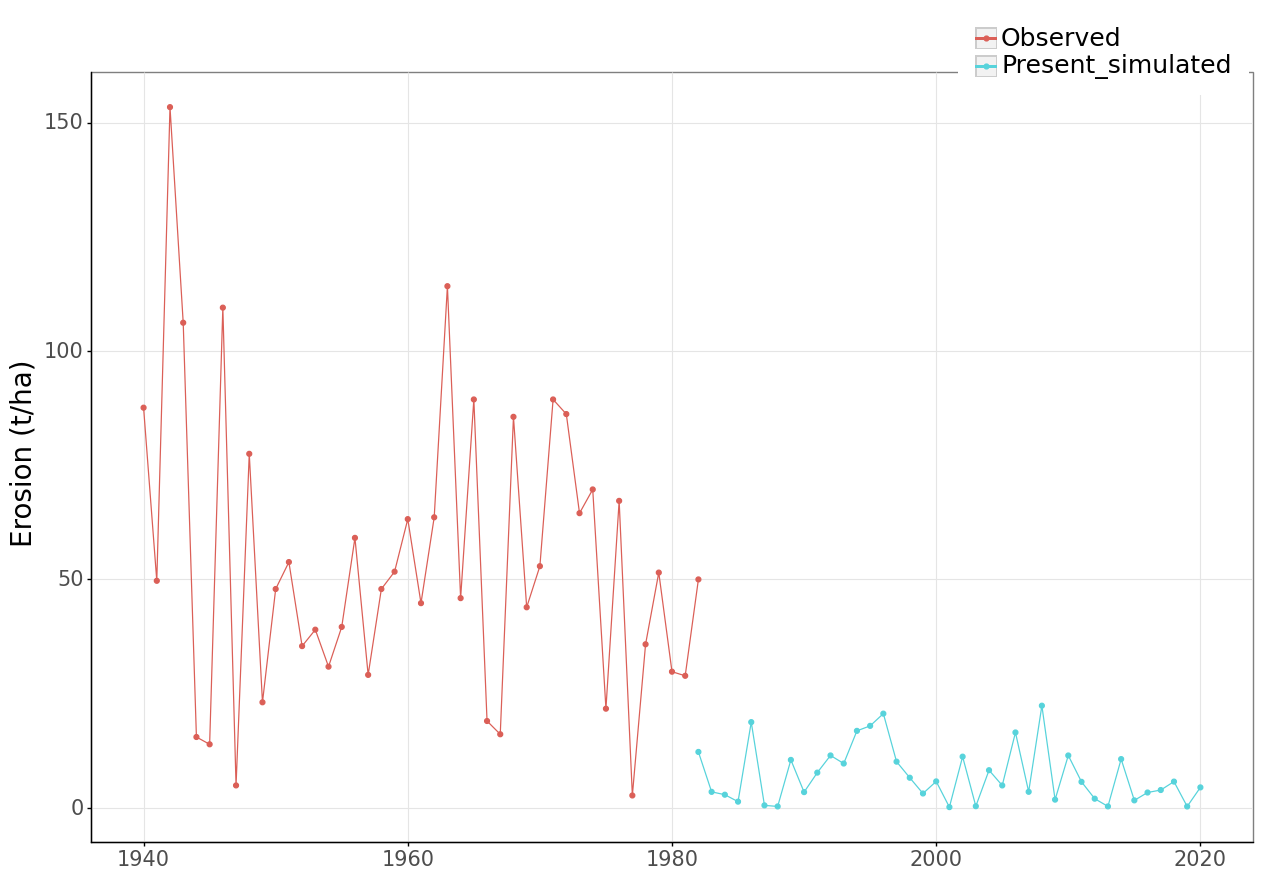

<ggplot: (101795755366)>

In [95]:
ggplot(pre_avgvs_observed, aes('Year', 'Erosion (t/ha)', color = 'Type'))+geom_point()+geom_line()+theme_bw()+mythemes+\
theme(legend_direction = 'vertical', legend_position = (0.8,0.90), figure_size = (15,10))

In [96]:
comp_dat3 = pd.melt(comp_dat2,id_vars = ['Year'], value_vars = ['Observed', 'Fallow-Wheat','Wheat-Fallow'], value_name = "Quantity", var_name = "Erosion")
sedcomp_2 = pd.melt(sedcomp,id_vars = ['Year'], value_vars = ['Watershed version (t/ha)'], value_name = "Quantity", var_name = "Erosion")

comp_dat4 = pd.concat([comp_dat3,sedcomp_2])

NameError: name 'sedcomp' is not defined

In [ ]:
ggplot(comp_dat4, aes('Year', 'Quantity', color = 'Erosion'))+geom_point()+geom_line()+theme_bw()+mythemes+\
theme(legend_direction = 'vertical', legend_position = (0.8,0.90), figure_size = (15,10))

### Compare Four different runs with observed erosion

In [ ]:
yearly_wat_df_v2 = yearly_agg_watershed(weppdir2+"\\wepp\\output")
sed_yearly_v2 = yearly_wat_df_v2[0].reset_index()


In [ ]:
#sed_yearly_v2['Sed. Det. (t/ha)']
sed_yearly_v2 = sed_yearly_v2[['WY','Sed. Det. (t/ha)']]

In [ ]:
#sed_yearly_v2 = sed_yearly_v2['WY','Sed. Det. (t/ha)']
sed_yearly_v2.columns = ['WY', 'Watershed version rotation 2']


In [ ]:
sed_yearly2_v2 = pd.melt(sed_yearly_v2,id_vars = ['WY'], value_vars = ['Watershed version rotation 2'], value_name = "Quantity", var_name = "Erosion")
sed_yearly2_v2.head()
sed_yearly2_v2.columns = ["Year","Erosion","Quantity"]

# comp_dat4

In [ ]:
comp_dat5 = pd.concat([comp_dat4, sed_yearly2_v2])
comp_dat5.to_csv("All_data.csv")

In [ ]:
ggplot(comp_dat5, aes('Year', 'Quantity', color = 'Erosion'))+geom_point()+geom_line()+theme_bw()+mythemes+\
theme(legend_direction = 'vertical', legend_position = (0.8,0.90), figure_size = (15,10))

In [ ]:
def nseff(observed,modeled):
    
    means = observed.mean()
    error = observed-modeled
    errr_sq = error*error
    sserror = errr_sq.sum()
    meanerror = observed-means
    meanerrr_sq = meanerror*meanerror
    ss_meanerror = meanerrr_sq.sum()
    nse = 1- (sserror/ss_meanerror)
    
    return nse,means, error, errr_sq, sserror, meanerror,meanerrr_sq, ss_meanerror, nse

In [ ]:
# obs = comp_v1[comp_v1['Erosion']=="Observed"]["Quantity"]
# wsd1 = comp_v1[comp_v1['Erosion']=="Watershed version (t/ha)"]["Quantity"]
# hs1 = comp_v1[comp_v1['Erosion']=="Wheat-Fallow"]["Quantity"]
# wsd2 = comp_v2[comp_v2['Erosion']=="Watershed version rotation 2"]["Quantity"]
# hs2 = comp_v2[comp_v2['Erosion']=="Fallow-Wheat"]["Quantity"]

In [ ]:
#nseff(obs,wsd1)

In [ ]:
# observed = obs
# modeled = hs1

In [ ]:
#pd.merge(comp_dat2,sed_yearly_v2, axis=1, on = "Year", how = "outer")
#pd.concat(#obs
#sed_yearly_v2
#comp_dat2
# sedcomp
#pd.concat([comp_dat2, sed_yearly2_v2], axis = 1)

In [ ]:
#hs1

In [ ]:
# means = observed.mean()
# #means
# error = observed-modeled
#error
# errr_sq = error*error
# errr_sq

# sserror = errr_sq.sum()
# sserror
# meanerror = observed-means
# meanerror
# meanerrr_sq = meanerror*meanerror
# meanerrr_sq

# ss_meanerror = meanerrr_sq.sum()
# ss_meanerror
# nse = 1- (sserror/ss_meanerror)
# nse

# Compare one to one

In [ ]:
#comp_v1 = comp_dat5[(comp_dat5['Erosion']=='Watershed version (t/ha)') or (comp_dat5['Erosion']=='Fallow-Wheat') or (comp_dat5['Erosion']=='Observed')]

comp_v1 = comp_dat5[comp_dat5['Erosion'].isin(['Observed','Watershed version (t/ha)','Wheat-Fallow'])]
comp_v2 = comp_dat5[comp_dat5['Erosion'].isin(['Observed','Watershed version rotation 2','Fallow-Wheat'])]

In [ ]:
ggplot(comp_v1, aes('Year', 'Quantity', color = 'Erosion'))+geom_point()+geom_line()+theme_bw()+mythemes+\
theme(legend_direction = 'vertical', legend_position = (0.8,0.90), figure_size = (15,10))

In [ ]:
ggplot(comp_v2, aes('Year', 'Quantity', color = 'Erosion'))+geom_point()+geom_line()+theme_bw()+mythemes+\
theme(legend_direction = 'vertical', legend_position = (0.8,0.90), figure_size = (15,10))

# Water Balance in the watershed

In [ ]:
wat_bal_yearly['ET'] = wat_bal_yearly['Evaporation (mm)']+ wat_bal_yearly["Transpiration (mm)"]

In [ ]:
wat_bal_yearly = wat_bal_yearly.drop(['Storage (mm)','Precip mm)','Evaporation (mm)',"Transpiration (mm)"], axis=1)
# wat_bal_yearly.plot(figsize = (15,15))

In [ ]:
#wat_bal_yearly

In [ ]:
tovals_names2 = wat_bal_yearly.columns.tolist()[1:]

In [ ]:
wat_yearly2 = pd.melt(wat_bal_yearly,id_vars = ['WY'], value_vars = tovals_names2, value_name = "Quantity", var_name = "Water Balance")

In [ ]:
ggplot(wat_yearly2, aes('WY', 'Quantity', color = 'Water Balance'))+geom_point()+geom_line()+theme_bw()+mythemes+\
theme(legend_direction = 'vertical', legend_position = (0.8,0.98), figure_size = (20,10))

# Sample hillslope 
### Hillslope 1

## Water Balance

In [ ]:
Hillslope_num = 1
Hill="H"+str(Hillslope_num)

In [ ]:
########### Sample hillslope ##########################
agg_wat_hill = aggregate_water_balance(weppdir+"\\wepp\\output\\"+Hill+".wat.dat")
agg_wat_hill2 = agg_wat_hill.reset_index()
agg_wat_hill3 = pd.melt(agg_wat_hill2, id_vars=['Y','OFE'], value_vars = ['RM','Q','E','Dp','latqcc'])
agg_wat_hill3.columns = ['Year', 'OFE', 'Property', 'Quantity']

In [ ]:
ggplot(agg_wat_hill3, aes('Year', 'Quantity', color='factor(OFE)')) +\
    geom_point(size = 1.7)+geom_line(size = 1.7) +\
    facet_wrap('~Property') +\
    theme_bw() +\
    ggtitle("Water Balance Component by OFE") +\
    mythemes

In [ ]:
calc_yrr = calcyearlyerr((weppdir+"\\wepp\\output"),(Hill+".ebe.dat"), 1989)
event_yrr_wat = calc_yrr[['Water Year','Precp','Runoff']]
event_yrr_sed = calc_yrr[['Water Year','IR-det', 'Av-det', 'Av-dep']]

In [ ]:
event_yrr_sed2 = pd.melt(event_yrr_sed, id_vars = ['Water Year'], value_vars = ['IR-det', 'Av-det', 'Av-dep'], var_name = 'Sediments',
        value_name = 'Quantities')
event_yrr_wat2 = pd.melt(event_yrr_wat, id_vars = ['Water Year'], value_vars = ['Precp','Runoff'], var_name = 'Water Balance',
        value_name = 'Quantities')

In [ ]:
ggplot(event_yrr_wat2, aes('Water Year', 'Quantities',color='Water Balance'))+geom_point()+geom_line()+theme_bw()+mythemes

## Erosion

In [ ]:
ggplot(event_yrr_sed2, aes('Water Year', 'Quantities',color='Sediments'))+geom_point()+geom_line()+theme_bw()+mythemes